# Project Overview
Dataset yang digunakan pada projek ini adalah dataset publik yang tersedia diwebsite kaggle, untuk mendapatkan dataset dapat ditemukan melalui link <a href="https://www.kaggle.com/jsphyg/weather-dataset-rattle-package"><b> klik disini</b></a>.  Dataset ini memiliki 23 atribut yang berisi informasi mengenai record data hujan harian selama 10 tahun di Australia. Obejktif yang ingin dicapai dari penelitian ini adalah untuk memprediksi cuaca apakah hari selanjutnya hujan atau tidak dengan mengimplementasikan analisa prediction menggunakan algoritma Logistic Regression dan Support Vector Machine (SVM). Sebelum melakukan modeling perlu dilakukan processing data agar model prediksi yang dihasilkan memiliki tingkat akurasi yang optimal.
#### Final Project 2 ini dibuat guna mengevaluasi konsep Regression sebagai berikut:
* Mampu memahami konsep Classification dengan Logistic Regression dan SVM
* Mampu mempersiapkan data untuk digunakan dalam model  Logistic Regression dan SVM
* Mampu mengimplementasikan  Logistic Regression dan SVM untuk membuat prediksi

#### Attribute Information:
- Date - tanggal hari itu
- Location - lokasi, nama kota di Australia
- MinTemp - temperatur terendah hari itu dalam celcius
- MaxTemp - temperatur tertinggi hari itu dalam celcius
- Rainfall - jumlah curah hujan hari itu dalam mm
- Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
- sebelum jam 9 pagi hari itu
- Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
- WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
- jam 12 malam hari itu
- WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
- jam sebelum jam 12 malam hari itu
- WindDir9am - arah angin jam 9 pagi
- WindDir3pm - arah angin jam 3 sore
- WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
- rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
- rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- Humidity9am - humiditas jam 9 pagi dalam persen
- Humidity3pm - humiditas jam 3 sore dalam persen
- Pressure9am - tekanan udara jam 9 pagi dalam hpa
- Pressure3pm - tekanan udara jam 3 sore dalam hpa
- Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
- oktas, unit 1⁄8, menghitung berapa unit 1⁄8 dari langit yang tertutup awan. Jika 0,
- langit cerah, jika 8, langit sepenuhnya tertutup awan.
- Cloud3pm - persentase langit yang tertutup awan jam 3 sore
- Temp9am - temperatur jam 9 pagi dalam celcius
- Temp3pm - temperatur jam 3 sore dalam celcius
- RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
- melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
- RainTomorrow - variable yang mau di prediksi

# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn.metrics
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# Load Dataset

In [2]:
df = pd.read_csv("./dataset/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.shape

(145460, 23)

Dataset ini berisi lebih dari 145000 record dan memiliki total 23 kolom yang berisi data bertipe numerik dan data bertipe categorical. selanjutnya untuk informasi data lebih lanjut, cek info dan cek missing value pada dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Terdapat banyak missing value pada dataset ini khususnya pada atribut target yaitu RainTomorrow, missing value pada kolom tersebut bisa langsung di drop karena jika tidak dihapus atau diisi dengan metode seperti mean/median akan menimbulkan bias pada hasil prediksi nanti.

# Data Cleaning &  Exploratory Data Analysis (EDA)

In [6]:
df.dropna(subset=['RainTomorrow'], inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


Pada hasil deskripsi diatas dapat dilihat bahwa terdapat outlier yang cukup besar pada beberapa fitur seperti pada fitur Rainfall, Evaporation, WindGustSpeed, Sunshine, WindSpeed9am, WindSpeed3pm

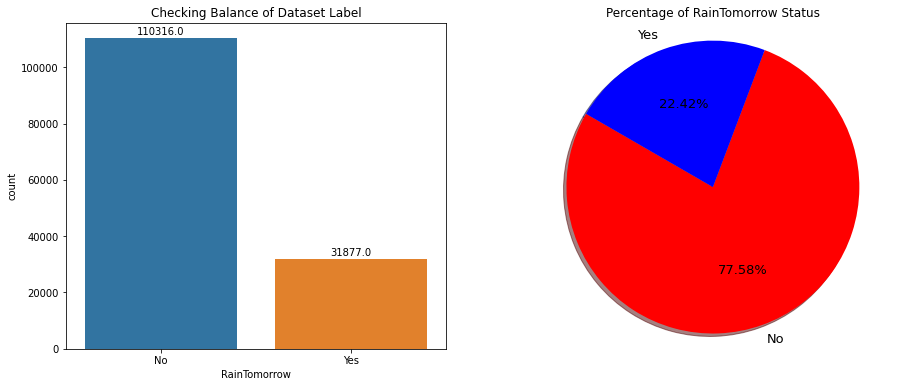

In [8]:
# Cek Keseimbangan jumlah data pada atribut target
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(121)
plt.title("Checking Balance of Dataset Label")
ax = sns.countplot(x='RainTomorrow', data=df)
for i in ax.patches:
    ax.annotate(format(i.get_height(), '0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center',va='center',xytext=(0,7), textcoords='offset points')
plt.subplot(122)
plt.title("Percentage of RainTomorrow Status")
rainTomorrow_values_count = df['RainTomorrow'].value_counts()
rainTomorrow_size = rainTomorrow_values_count.values.tolist()
rainTomorrow_labels = 'No', 'Yes'
colors=['red', 'blue']
pcs, texts, autotexts = plt.pie(rainTomorrow_size, labels=rainTomorrow_labels, colors=colors,
                             autopct='%2.2f%%', shadow=True, startangle=150)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(13)
    autotext.set_fontsize(13)

plt.axis('equal')
plt.show()

Dari visualisasi diatas dapat dilihat bahwa jumlah data pada variabel target (RainTomorrow) terdapat perbedaan jumlah yang cukup besar. Dimana jumlah data 'No' sebesar 110316 dengan persentase 77.58% sedangkan jumlah data 'Yes' hanya sebesar 31877 dengan persentase dari keseluruhan data sebesar 22.42%. Hal ini menunjukkan bahwa data tersebut mengalami imbalanced data atau data tidak seimbang. Maka diperlukan handling imbalanced data menggunakan metode yang tepat.

In [9]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

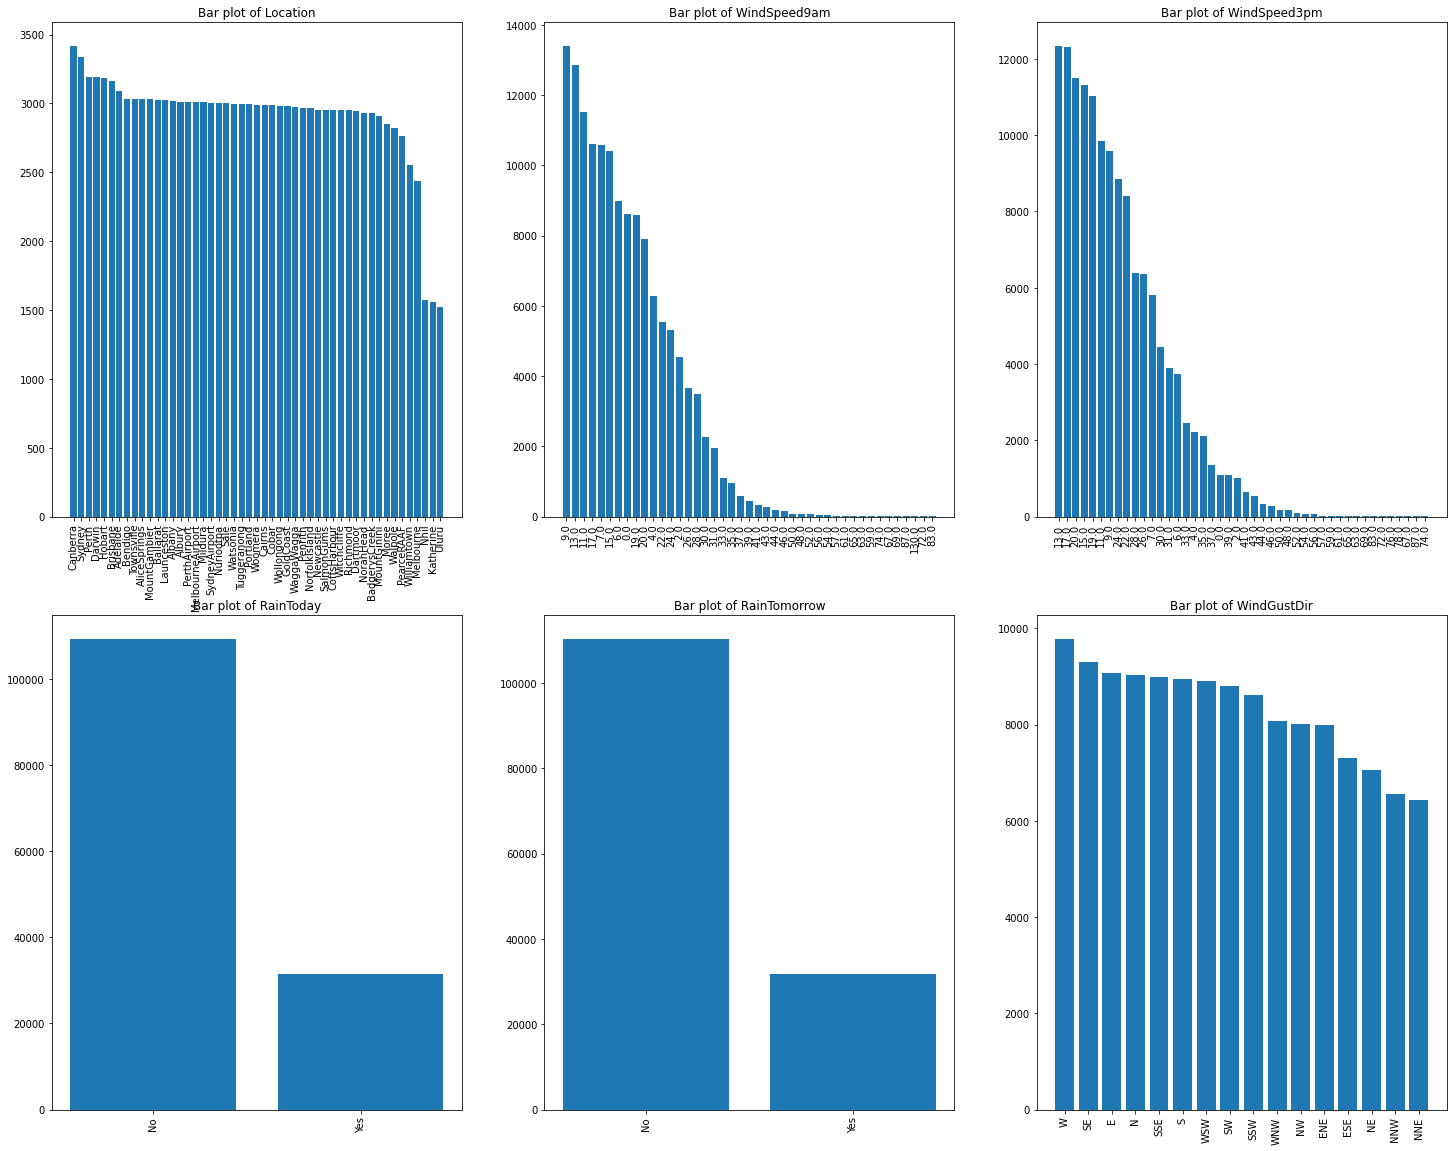

In [14]:
# Categorical columns exploration
categorical_cols = ['Location','WindSpeed9am', 'WindSpeed3pm','RainToday', 'RainTomorrow','WindGustDir']
fig, ax = plt.subplots(2,3, sharex=False, sharey=False, figsize=(25,20))
count = 0
for cat_col in categorical_cols:
    value_count = df[cat_col].value_counts()
    ax_x = count//3
    ax_y = count%3
    x_range = np.arange(0, len(value_count))
    ax[ax_x, ax_y].bar(x_range, value_count.values, tick_label=value_count.index)
    ax[ax_x, ax_y].set_title(f"Bar plot of {cat_col}")
    
    for i in ax[ax_x, ax_y].get_xticklabels():
        i.set_rotation(90)
    
    count+=1
plt.show()

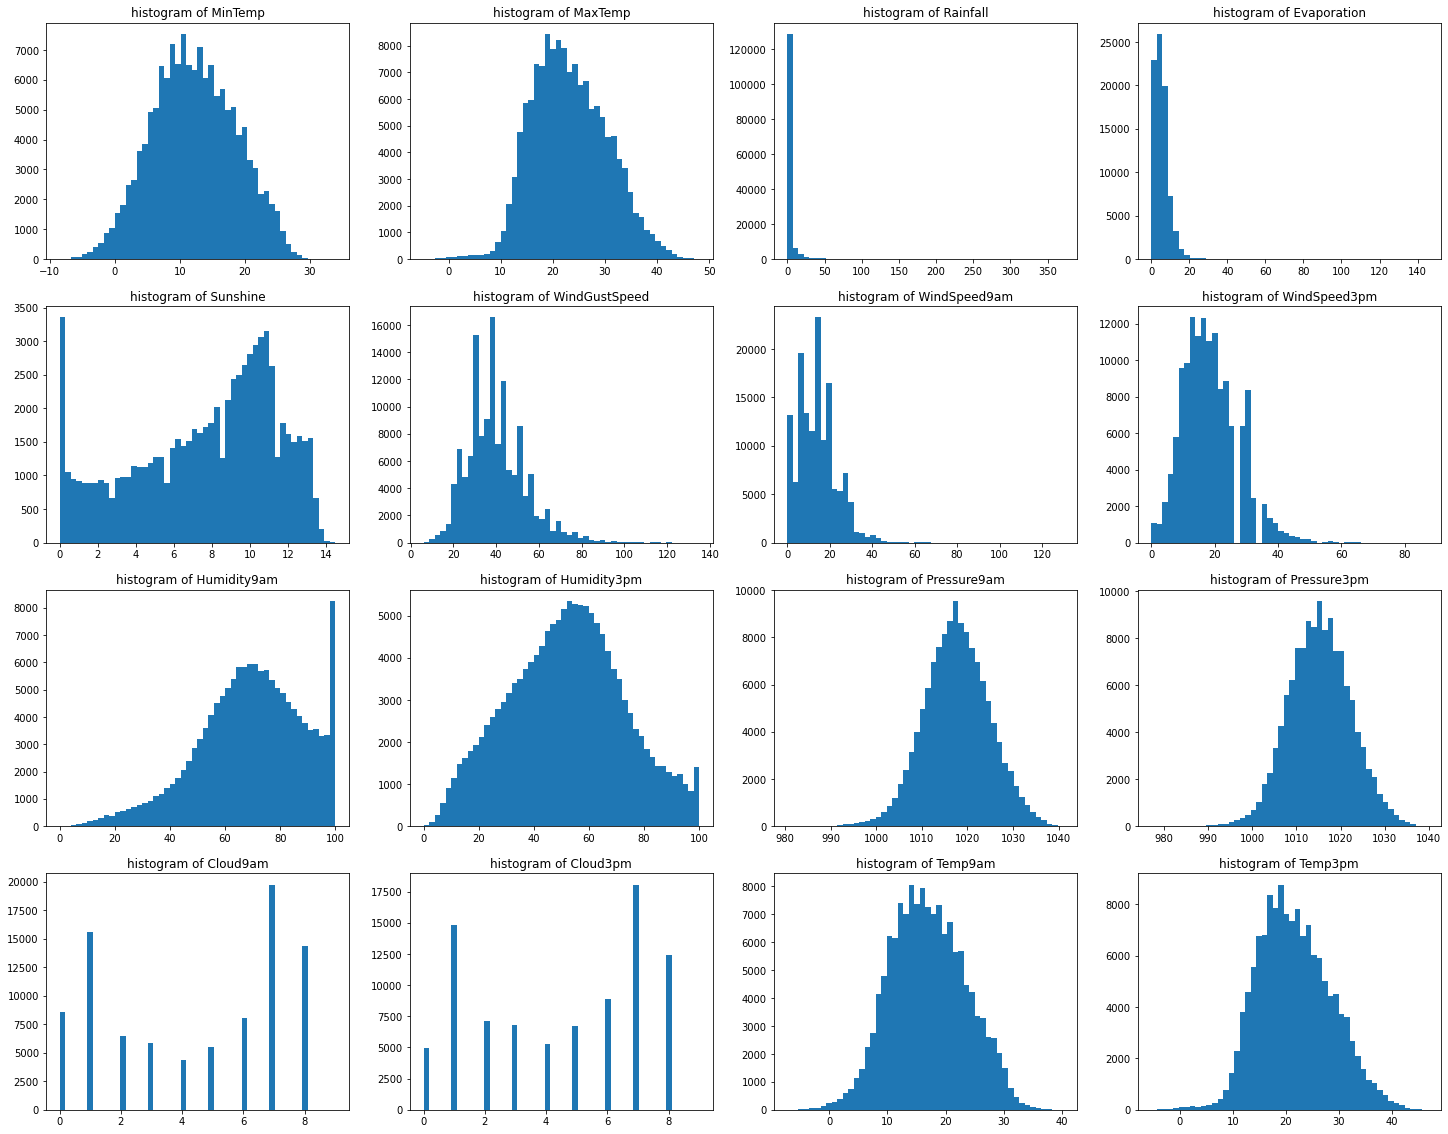

In [16]:
# Numeric columns exploration
num_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine','WindGustSpeed',
                   'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 
                    'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']
fig, ax = plt.subplots(4,4, sharex=False, sharey=False, figsize=(25,20))
count = 0
for num_col in num_cols:
    ax_x = count//4
    ax_y = count%4
    
    ax[ax_x, ax_y].hist(df[num_col], bins=50)
    ax[ax_x, ax_y].set_title(f"histogram of {num_col}")
    count+=1
plt.show()

Data yang memiliki distribusi normal yaitu MinTemp, MaxTemp, Humadity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm

#### Korelasi antar fitur Sunshine dengan fitur Rainfall dan fitur Sunshine dengan fitur Evaporation

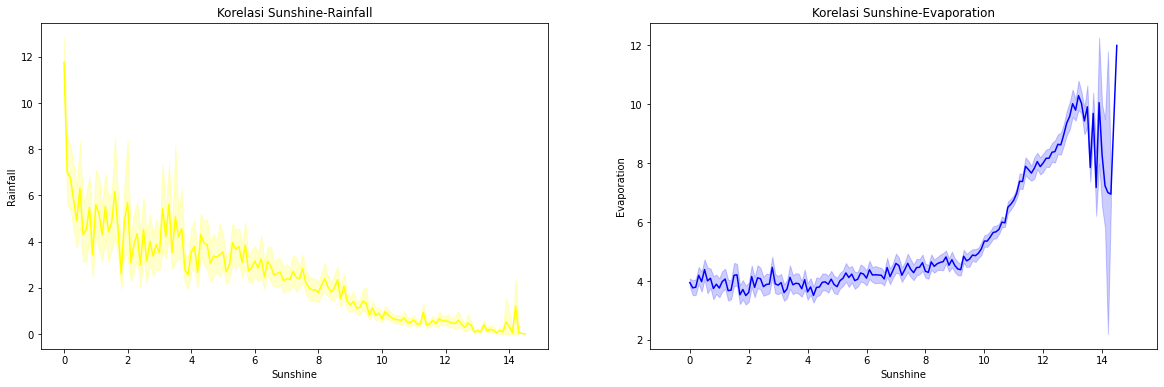

In [17]:
plt.rcParams['figure.figsize']=(20,6)
plt.subplot(121)
plt.title("Korelasi Sunshine-Rainfall")
sns.lineplot(data=df, x='Sunshine',y='Rainfall', color='yellow')

plt.subplot(122)
plt.title("Korelasi Sunshine-Evaporation")
sns.lineplot(data=df, x='Sunshine', y='Evaporation', color='blue')
plt.axis('equal')
plt.show()

Dapat dilihat bahwa Sunshine(intensitas cahaya matahari) berbanding terbalik dengan Rainfall(jumlah curah hujan), semakin rendah nilai sunshine semakin tinggi nilai Rainfall dan sebaliknya. sedangkan korelasi antara Sunshine berbanding lurus dengan Evaporation (penguapan), semakin tinggi nilai Sunshine semakin tinggi pula nilai Evaporation.

#### Kota dengan hari yang mengalami hujan paling banyak

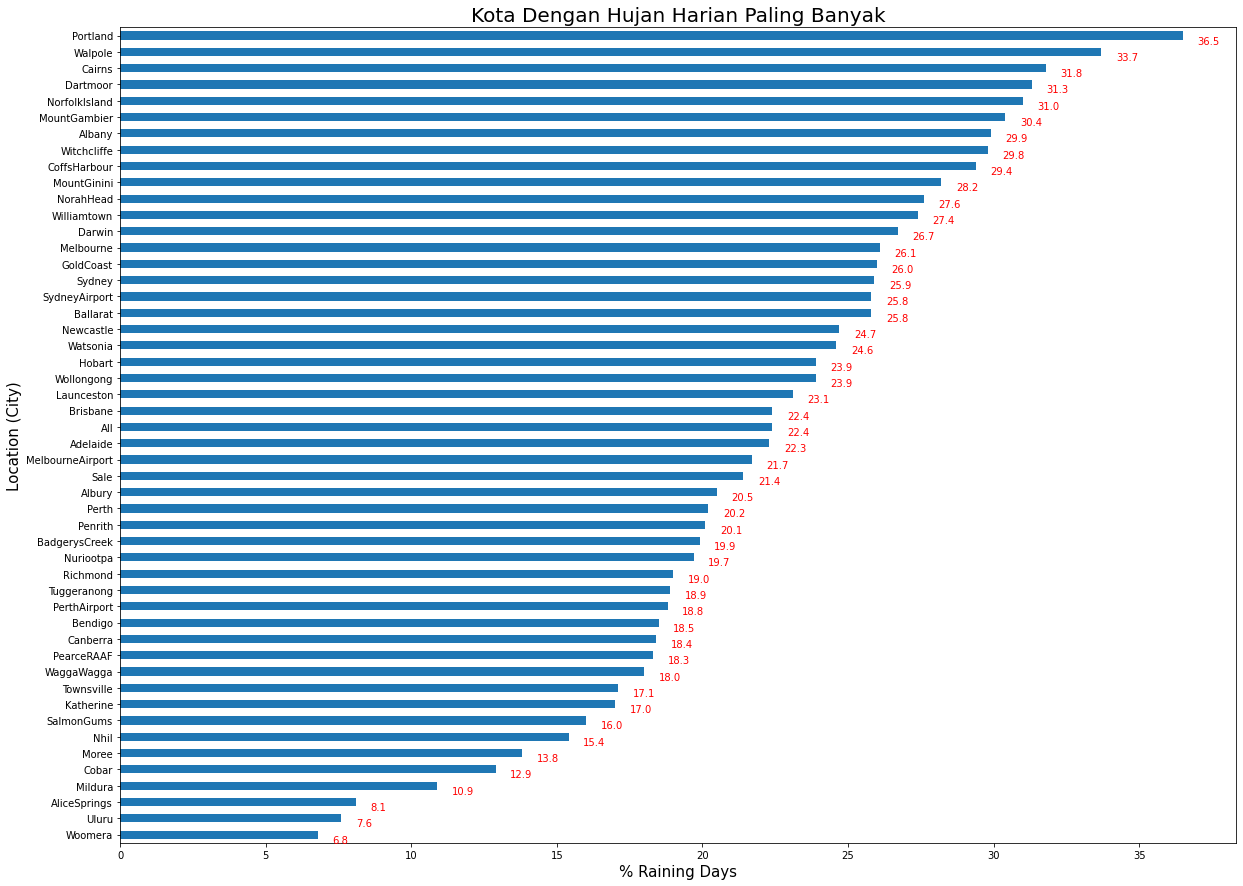

In [19]:
location_rain = pd.crosstab(index=df['Location'], columns=df['RainTomorrow'], values=df['RainTomorrow'],
                           aggfunc='count', margins=True)
location_rain['% Yes'] = (location_rain['Yes']/location_rain['All']).round(3)*100
fig, ax = plt.subplots(figsize=(20,15))
location_rain['% Yes'].sort_values().plot(kind='barh')
ax.set_xlabel("% Raining Days", fontsize=15)
ax.set_ylabel("Location (City)", fontsize=15)
ax.set_title("Kota Dengan Hujan Harian Paling Banyak", fontsize=20)
y = location_rain['% Yes'].sort_values().values
for k,v in enumerate(y):
    ax.text(v+0.5 , k-0.5 , round(float(v),1), color='red')


* Kota Portland,Walpole,Caims,Norfolk Island,Dartmoor merupakan top 5 kota dengan curah hujan harian terbanyak.
* Kota Uluru, Alice Springs, dan Woomera merupakan 3 terendah dengan jumlah kurang dari 10%.

#### Korelasi antara Humidity3pm dan Temp3pm terhadap prediksi hujan hari setelahnya (RainTomorrow)

In [24]:
px.scatter(df.sample(5000), x='Temp3pm', y='Humidity3pm',
           title="Humadity (3PM) vs Temperature (3PM)",color='RainTomorrow')

* Jika hari ini (3PM) temperatur tinggi dan Kelembapan (Humadity) rendah, kemungkinan untuk turun hujan pada hari setelahnya memiliki probabilitas yang rendah.
* Jika temperatur hari ini (3PM) rendah dan kelembapan hari ini (3PM) tinggi, kemungkinan hari besoknya akan turun hujan memiliki probabilitas yang cukup tinggi.

# Data Preprocessing

# Modeling

# Conclusion